In [1]:
import pandas as pd

# DA Mini Project

* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```

* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 실제 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [36]:
df = pd.read_table('data/mini.csv',sep=',')

## 1)문제 정의 및 가설 설정하기

### 문제 정의 
구독 연장 확률에 영향을 미치는 핵심 요인은 무엇일까?

### 가설 설정

```
1. subscription_duration
사용자가 서비스에 가입한 기간이 길수록 구독을 연장할 가능성이 높을 것이다. 신규 가입자와 장기 가입자 간의 연장률 차이를 분석한다면 유의미한 결과를 얻을 수 있지 않을까?

2. recent_login_time, average_login_time
최근 로그인 시점과 평균 로그인 시간 패턴을 분석하여 활성 사용자와 비활성 사용자를 구분할 수 있겠다. 활성 사용자일수록 구독 연장 가능성이 높을 것 같다.

3. average_time_per_learning_session, monthly_active_learning_days
학습 시간과 실제 수업 들은 일수가 많을수록 서비스에 대한 몰입도가 높고, 구독 연장률도 높아질 것 같다.

4. total_completed_courses, recent_learning_achievement
완료한 코스 수와 최근 학습 성취도가 높을수록 학습 효과를 잘 체감하고 있다는 신호이므로 구독 연장에 긍정적일 것 같다.

5. abandoned_learning_sessions
중단된 학습 세션이 많으면 학습 지속성이 낮고, 구독 연장 가능성도 낮아질 수 있겠다.

6. community_engagement_level
커뮤니티 활동이 활발할수록 서비스에 대한 애착과 충성도가 높아질 것이다.

7. preferred_difficulty_level, subscription_type
선호하는 난이도와 구독 유형에 따라 학습 콘텐츠 및 서비스 만족도가 달라질 수 있겠다.

8. customer_inquiry_history
고객 문의 이력이 많으면 서비스에 대한 불만족이 높아 구독 연장률이 낮아질 수 있을 것 같다.

9. payment_pattern
과거 결제 패턴을 분석하면 향후 구독 연장 가능성을 예측하는 데 도움이 될 것이다.
```

## 2)데이터 분석 기본 세팅하기

우선 결측치와 기술통계를 확인해보자

In [37]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [40]:
#결측치는 존재하지 않는것으로 보인다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [41]:
df.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994061,54.917697,12.545400,12.227500,75.029477,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001848,56.024263,6.932239,3.634125,9.968565,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.370000,0.010000,1.000000,1.000000,35.940000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.027500,15.280000,7.000000,10.000000,68.277500,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.980000,37.580000,13.000000,12.000000,75.125000,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,17.000000,75.582500,19.000000,15.000000,81.720000,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,27.000000,503.370000,24.000000,27.000000,112.640000,12.000000,5.000000,10.000000,7.000000,1.000000


## 3)데이터 분석하기 & 4)데이터 시각화

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import koreanize_matplotlib 

### 1. subscription_duration
사용자가 서비스에 가입한 기간이 짧을수록 구독을 연장할 가능성이 높을 것이다. 신규 가입자와 장기 가입자 간의 구독연장률 차이를 분석한다면 유의미한 결과를 얻을 수 있지 않을까?

(1) 현황 분석

In [205]:
df.groupby('subscription_duration')['user_id'].count()

subscription_duration
1     436
2     443
3     408
4     475
5     424
6     471
7     432
8     438
9     440
10    448
11    428
12    461
13    437
14    418
15    408
16    448
17    429
18    464
19    423
20    412
21    433
22    414
23    410
Name: user_id, dtype: int64

In [150]:
df.subscription_duration.describe()

count    10000.000000
mean        11.897400
std          6.600896
min          1.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: subscription_duration, dtype: float64



(2) 신규 가입자와 장기 가입자 간의 연장률 차이 분석
```
신규 가입자 : 총 서비스 가입 기간 1~2개월 유저
장기 가입자 : 총 서비스 가입 기간 3개월 이상인 유저

분류 근거 : payment_pattern의 기준을 참고했을 때 적절하다고 생각했다
```

In [180]:
# 신규 가입자와 장기 가입자 조건 설정
new_subscriber_condition = (df['subscription_duration'] >= 1) & (df['subscription_duration'] <= 2)
long_term_subscriber_condition = (df['subscription_duration'] >= 3)

In [181]:
# 신규 가입자와 장기 가입자 데이터프레임 생성
new_subscribers = df[new_subscriber_condition]
long_term_subscribers = df[long_term_subscriber_condition]

In [182]:
# 각 그룹에 대한 구독 연장률 계산
new_subscriber_renewal_rate = new_subscribers['target'].mean()
long_term_subscriber_renewal_rate = long_term_subscribers['target'].mean()

In [183]:
# 결과 출력
print(f"신규 가입자 구독 연장률: {new_subscriber_renewal_rate:.2%}")
print(f"장기 가입자 구독 연장률: {long_term_subscriber_renewal_rate:.2%}")

신규 가입자 구독 연장률: 62.34%
장기 가입자 구독 연장률: 61.96%


(3) 데이터 시각화

In [188]:
# 데이터프레임 생성
data = {'사용자 그룹': ['신규 가입자', '장기 가입자'],
        '구독 연장률': [new_subscriber_renewal_rate, long_term_subscriber_renewal_rate]}
df_viz1 = pd.DataFrame(data)
df_viz1

,사용자 그룹,구독 연장률
0,신규 가입자,0.623436
1,장기 가입자,0.619559


<Figure size 800x1000 with 0 Axes>

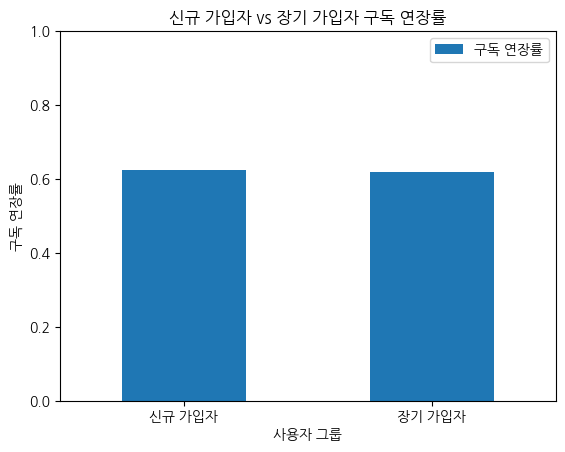

In [189]:
# 바 차트 그리기
plt.figure(figsize=(8, 10))
ax = df_viz1.plot(kind='bar', x='사용자 그룹', y='구독 연장률', rot=0)
ax.set_ylim(0, 1)  # y축 범위 설정
plt.ylabel('구독 연장률')
plt.title('신규 가입자 vs 장기 가입자 구독 연장률')

plt.show()

### 2. recent_login_time, average_login_time
최근 로그인 시점(일)과 평균 로그인 시간(분) 패턴을 분석하여 활성 사용자와 비활성 사용자를 구분할 수 있겠다. 활성 사용자일수록 구독 연장률이 높을 것 같다.

(1)현황분석

In [132]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.95,8.43,18,16,68.36,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.45,72.65,16,13,97.57,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.20,21.77,13,14,94.36,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.63,42.66,19,18,70.15,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.39,30.74,19,10,81.92,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.73,84.05,18,16,64.97,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.37,45.46,9,8,82.75,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.24,127.30,24,14,81.57,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.78,5.30,10,10,89.89,4,5,Low,Basic,2,0,1


In [146]:
rl_ex1=df.groupby('recent_login_time')['user_id'].count()
rl_ex1

recent_login_time
1     347
2     350
3     349
4     332
5     355
6     362
7     322
8     322
9     350
10    335
11    306
12    365
13    363
14    366
15    325
16    347
17    354
18    336
19    380
20    362
21    333
22    349
23    338
24    328
25    323
26    359
27    370
28    313
29    359
Name: user_id, dtype: int64

In [149]:
df.recent_login_time.describe()

count    10000.000000
mean        15.013200
std          8.362573
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max         29.000000
Name: recent_login_time, dtype: float64

In [148]:
df.average_login_time.describe()

count    10000.000000
mean        14.994061
std          3.001848
min          2.370000
25%         13.027500
50%         14.980000
75%         17.000000
max         27.000000
Name: average_login_time, dtype: float64

(2) 활성사용자가 정말 구독연장률이 높은지 확인하기

```
활성사용자 : 최근 로그인 시점이 17일 미만 경과했거나 (or) 평균 로그인 시간이 8분 이상 일때
비활성사용자 : 최근 로그인 시점이 17일 이상 경과했거나 (or) 평균 로그인 시간이 8분 미만 일때

분류 근거 : 3/4분위 수
```

In [158]:
# 활성사용자와 비활성사용자 조건 설정
active_condition = ((df['recent_login_time'] < 17) | (df['average_login_time'] >= 8))
inactive_condition = ((df['recent_login_time'] >= 17) | (df['average_login_time'] < 8))

In [155]:
# 활성사용자와 비활성사용자 데이터프레임 생성
active_users = df[active_condition]
inactive_users = df[inactive_condition]

In [156]:
# 각 그룹에 대한 구독 연장률 계산
active_renewal_rate = active_users['target'].mean()
inactive_renewal_rate = inactive_users['target'].mean()

In [160]:
# 결과 출력
print(f"활성사용자 구독 연장률: {active_renewal_rate:.2%}")
print(f"비활성사용자 구독 연장률: {inactive_renewal_rate:.2%}")

활성사용자 구독 연장률: 61.99%
비활성사용자 구독 연장률: 61.62%


(3) 데이터 시각화

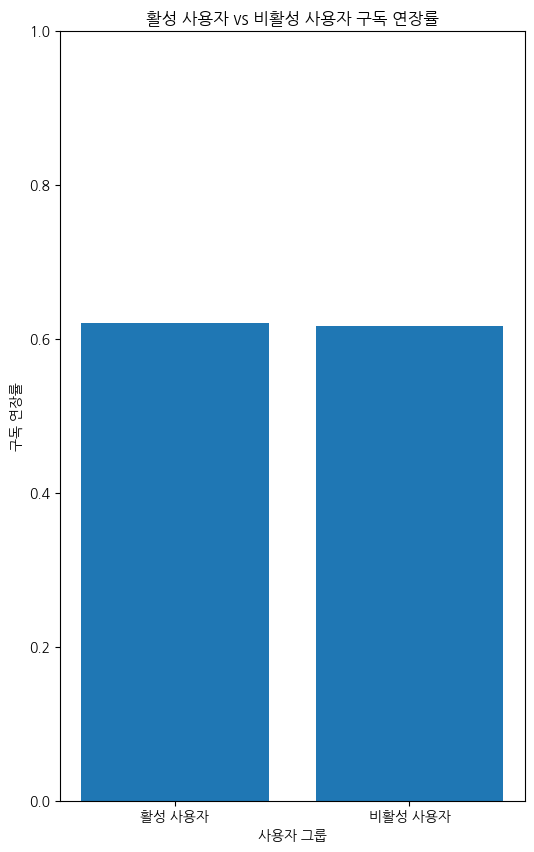

In [162]:
# 데이터 준비
groups = ['활성 사용자', '비활성 사용자']
renewal_rates = [active_renewal_rate, inactive_renewal_rate]

# 바 차트 그리기
plt.figure(figsize=(6, 10))
plt.bar(groups, renewal_rates)
plt.xlabel('사용자 그룹')
plt.ylabel('구독 연장률')
plt.ylim(0, 1)  # y축 범위 설정
plt.title('활성 사용자 vs 비활성 사용자 구독 연장률')

plt.show()

### 3. average_time_per_learning_session, monthly_active_learning_days
평균 학습 시간과 월간 실제 수업 들은 일수가 많을수록 서비스에 대한 몰입도가 높아 구독 연장률이 높아질 것 이다.

(1)현황분석

In [163]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.95,8.43,18,16,68.36,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.45,72.65,16,13,97.57,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.20,21.77,13,14,94.36,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.63,42.66,19,18,70.15,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.39,30.74,19,10,81.92,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.73,84.05,18,16,64.97,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.37,45.46,9,8,82.75,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.24,127.30,24,14,81.57,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.78,5.30,10,10,89.89,4,5,Low,Basic,2,0,1


In [165]:
df.average_time_per_learning_session.describe()

count    10000.000000
mean        54.917697
std         56.024263
min          0.010000
25%         15.280000
50%         37.580000
75%         75.582500
max        503.370000
Name: average_time_per_learning_session, dtype: float64

In [166]:
df.monthly_active_learning_days.describe()

count    10000.000000
mean        12.545400
std          6.932239
min          1.000000
25%          7.000000
50%         13.000000
75%         19.000000
max         24.000000
Name: monthly_active_learning_days, dtype: float64

(2)학습 몰입도 높은사람이 구독연장률이 정말 높은지 확인하기

```
학습몰입도 높은사람 : 평균 학습 시간 75분 이상이거나 (or) 월간 실제 수업 들은 일수 19일 이상인 사람
학습몰입도 낮은사람 : 평균 학습 시간 15분 이하이거나 (or) 월간 실제 수업 들은 일수 7일 이하인 사람

분류 근거 : 학습몰입도 높은사람 : 1/4분위수, 학습몰입도 낮은사람 : 3/4분위수
```

In [167]:
# 학습 몰입도 높은 사용자와 낮은 사용자 조건 설정
high_engagement_condition = ((df['average_time_per_learning_session'] >= 75) | (df['monthly_active_learning_days'] >= 19))
low_engagement_condition = ((df['average_time_per_learning_session'] <= 15) | (df['monthly_active_learning_days'] <= 7))

In [169]:
# 학습 몰입도 높은 사용자와 낮은 사용자 데이터프레임 생성
high_engagement_users = df[high_engagement_condition]
low_engagement_users = df[low_engagement_condition]

In [174]:
# 각 그룹에 대한 구독 연장률 계산
high_engagement_renewal_rate = high_engagement_users['target'].mean()
low_engagement_renewal_rate = low_engagement_users['target'].mean()
overall_renewal_rate = df['target'].mean()

In [175]:
# 결과 출력
print(f"학습 몰입도 높은 사용자 구독 연장률: {high_engagement_renewal_rate:.2%}")
print(f"학습 몰입도 낮은 사용자 구독 연장률: {low_engagement_renewal_rate:.2%}")
print(f"전체 평균 구독 연장률: {overall_renewal_rate:.2%}")

학습 몰입도 높은 사용자 구독 연장률: 64.99%
학습 몰입도 낮은 사용자 구독 연장률: 61.31%
전체 평균 구독 연장률: 61.99%


(3) 데이터 시각화

In [197]:
# 데이터프레임 생성
data = {'사용자 그룹': ['학습 몰입도 높음', '학습 몰입도 낮음', '전체 평균'],
        '구독 연장률': [high_engagement_renewal_rate, low_engagement_renewal_rate, overall_renewal_rate]}
df_viz2 = pd.DataFrame(data)
df_viz2

,사용자 그룹,구독 연장률
0,학습 몰입도 높음,0.64991
1,학습 몰입도 낮음,0.61307
2,전체 평균,0.61990


<Figure size 800x1000 with 0 Axes>

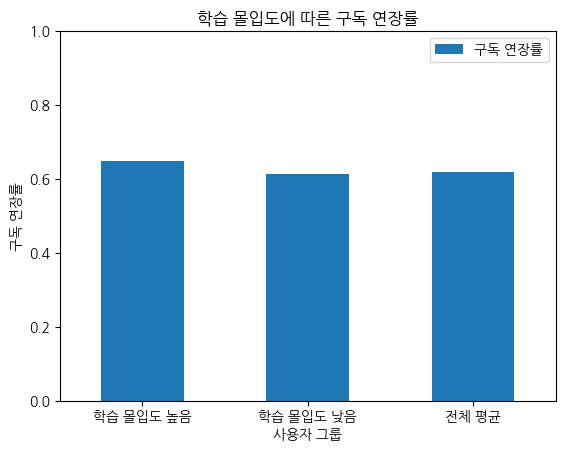

In [198]:
# 바 차트 그리기
plt.figure(figsize=(8, 10))
ax = df_viz2.plot(kind='bar', x='사용자 그룹', y='구독 연장률', rot=0)
ax.set_ylim(0, 1)  # y축 범위 설정
plt.ylabel('구독 연장률')
plt.title('학습 몰입도에 따른 구독 연장률')

plt.show()

## 최종결론

3가지 주제를 가지고 구독 연장 확률에 영향을 미치는 핵심 요인을 찾아보았다.

다음은 내가 내린 최종 결론이다.

### 1. subscription_duration
```
신규 가입자와 장기 가입자 간의 연장률 차이 분석

신규 가입자 : 총 서비스 가입 기간 1~2개월 유저
장기 가입자 : 총 서비스 가입 기간 3개월 이상인 유저


분류 근거 : payment_pattern의 기준을 참고했을 때 적절하다고 생각했다
```

In [192]:
df_viz1

,사용자 그룹,구독 연장률
0,신규 가입자,0.623436
1,장기 가입자,0.619559


<Figure size 800x1000 with 0 Axes>

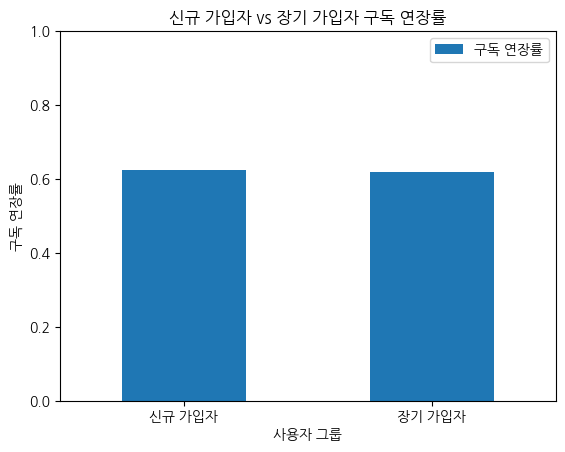

In [190]:
# 바 차트 그리기
plt.figure(figsize=(8, 10))
ax = df_viz1.plot(kind='bar', x='사용자 그룹', y='구독 연장률', rot=0)
ax.set_ylim(0, 1)  # y축 범위 설정
plt.ylabel('구독 연장률')
plt.title('신규 가입자 vs 장기 가입자 구독 연장률')

plt.show()

```
결론 : 신규 가입자와 장기 가입자 모두 구독 연장률이 60%대를 유지하는것은 겉으로 보기엔 호재라고 생각된다.

(1)초기 관심도가 높음 
신규 가입자가 서비스에 대한 기대감과 호기심이 높은 상태라고 정의할 수 있겠다. 이러한 초기 관심도가 구독 유지로도 잘 이어지고 있는 것 같다.

(2)할인 혜택, 프로모션, 체험 기간
정보를 없어서 알 수없지만 할인 혜택이나 프로모션에 영향 받았을 가능성도 있다. 이러한 것이 있다고 가정한다면 장기 가입자의 구독 연장률로 미루어 봤을때 전략이 매우 잘통하고 있다고 생각한다.
```

### 2. recent_login_time, average_login_time
```
활성사용자가 정말 구독연장률이 높은지 분석

활성사용자 : 최근 로그인 시점이 17일 미만 경과했거나 (or) 평균 로그인 시간이 8분 이상 일때
비활성사용자 : 최근 로그인 시점이 17일 이상 경과했거나 (or) 평균 로그인 시간이 8분 미만 일때

분류 근거 : 3/4분위 수
```

In [204]:
#'활성 사용자', '비활성 사용자' 비교
groups = ['활성 사용자', '비활성 사용자']
renewal_rates = [active_renewal_rate, inactive_renewal_rate]
renewal_rates

[0.6199276817999196, 0.6162434325744308]

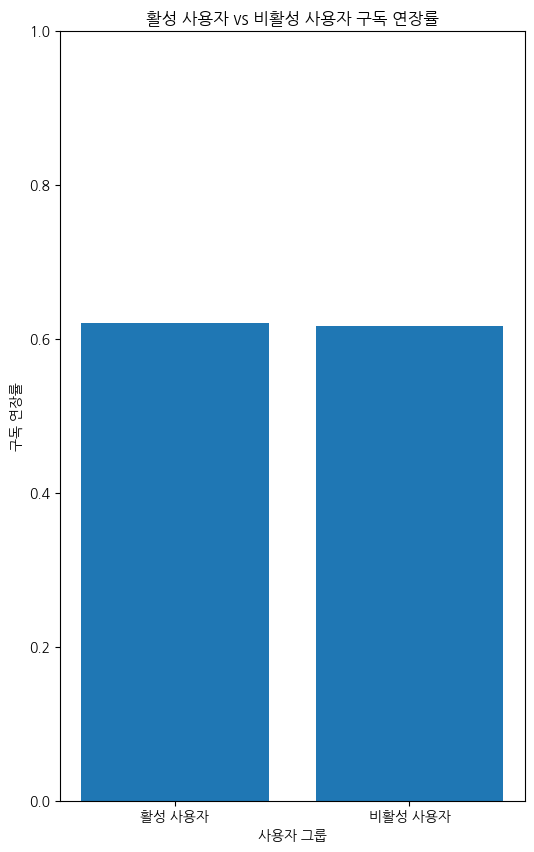

In [201]:


# 바 차트 그리기
plt.figure(figsize=(6, 10))
plt.bar(groups, renewal_rates)
plt.xlabel('사용자 그룹')
plt.ylabel('구독 연장률')
plt.ylim(0, 1)  # y축 범위 설정
plt.title('활성 사용자 vs 비활성 사용자 구독 연장률')

plt.show()

```
결론 : 활성 사용자와 비활성 사용자의 구독전환률은 차이가 미미하다. 이는 좋지않은 현상이다.

(1)충성도가 높지 않다는 신호
충성도가 높지않다는 신호일 수 있다. 하지만 구독전환률이 60%대인데..샘플데이터의 한계일 수도 있겠다는 생각이 든다.

(2) 비활성 사용자들에게 어떤 매력 요인이 있을수도 있겠다. 이 요인을 파악해볼 수도 있을 것 같다.
``` 

### 3. average_time_per_learning_session, monthly_active_learning_days
```
학습 몰입도 높은사람이 구독연장률이 정말 높은지 분석

학습몰입도 높은사람 : 평균 학습 시간 75분 이상이거나 (or) 월간 실제 수업 들은 일수 19일 이상인 사람
학습몰입도 낮은사람 : 평균 학습 시간 15분 이하이거나 (or) 월간 실제 수업 들은 일수 7일 이하인 사람

분류 근거 : 학습몰입도 높은사람 : 1/4분위수, 학습몰입도 낮은사람 : 3/4분위수
```

In [199]:
df_viz2

,사용자 그룹,구독 연장률
0,학습 몰입도 높음,0.64991
1,학습 몰입도 낮음,0.61307
2,전체 평균,0.61990


<Figure size 800x1000 with 0 Axes>

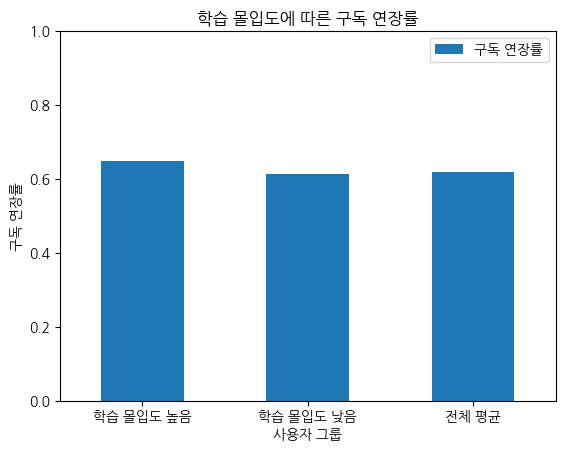

In [200]:
# 바 차트 그리기
plt.figure(figsize=(8, 10))
ax = df_viz2.plot(kind='bar', x='사용자 그룹', y='구독 연장률', rot=0)
ax.set_ylim(0, 1)  # y축 범위 설정
plt.ylabel('구독 연장률')
plt.title('학습 몰입도에 따른 구독 연장률')

plt.show()

```
결론 : 지금까지 분석한 데이터 중 가장 큰 차이를 보였다.

(1)심화 학습 콘텐츠 제공
심화학습 콘텐츠, 전문 자격증 취득 과정 등을 개설하여 지속적인 학습 동기를 부여하면 좋을 것 같다.

(2)커뮤니티 기능 강화
학습 몰입도가 높은 사용자들을 위한 전용 커뮤니티 공간을 마련한다면 토론, 프로젝트 협업 등 시너지 효과를 낼 수 있을 것 같다.
```